In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [3]:
batch_size = 128
nb_classes = 10

#input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape data
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train_shape: ', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print('One hot encoding: {}'.format(Y_train[0,:]))

X_train_shape:  (60000, 1, 28, 28)
60000 train samples
10000 test samples
One hot encoding: [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


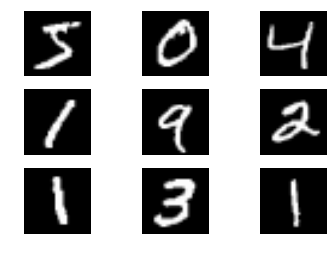

In [4]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i, 0], cmap = 'gray')
    plt.axis('off')

In [5]:
model = Sequential()
#Convolution2D(number_filter, row_size, column_size, input_shape = (nubmer_channels, img_row, img_col))
model.add(Convolution2D(6, 5, 5, input_shape = (1, img_rows, img_cols), border_mode = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, 5, 5, border_mode = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(120, 5, 5))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(84))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

# Train

In [6]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adadelta')

In [7]:
nb_epoch = 2
model.fit(X_train, Y_train, batch_size = batch_size, nb_epoch = nb_epoch, show_accuracy = True
          , verbose = 1, validation_data = (X_test, Y_test))
score = model.evaluate(X_test, Y_test, show_accuracy = True, verbose = 0)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 260s - loss: 0.2731 - acc: 0.9157 - val_loss: 0.0597 - val_acc: 0.9819
Epoch 2/2
60000/60000 [==============================] - 259s - loss: 0.0831 - acc: 0.9765 - val_loss: 0.0377 - val_acc: 0.9878
Test score:  0.0377046508389
Test accuracy:  0.9878


# Visalize sample results

9/9 [==============================] - 0s


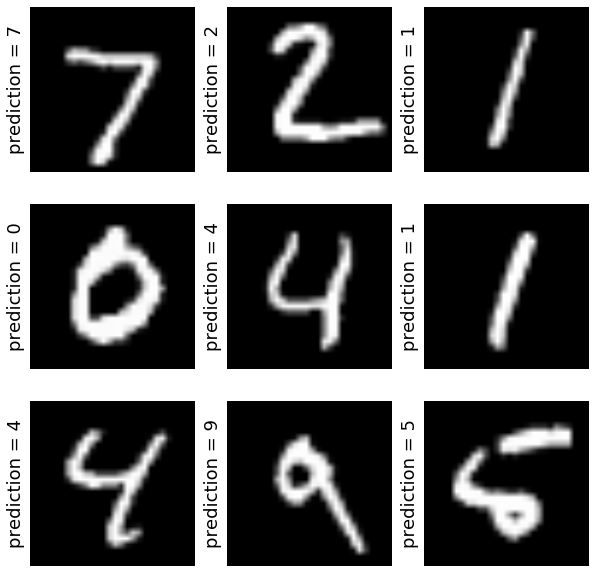

In [8]:
res = model.predict_classes(X_test[:9])
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i, 0], cmap = 'gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = %d' % res[i], fontsize = 18)